In [1]:
import pandas as pd

In [2]:
# Loading the dataset
df_train = pd.read_csv("./train_data.txt", sep = ":::", names = ['ID', 'Title', 'Genre', 'Description'])
df_test = pd.read_csv("./test_data.txt", sep = ":::", names = ['ID', 'Title', 'Description'])

C:\Users\vt020\AppData\Local\Temp\ipykernel_21848\2411597956.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_train = pd.read_csv("./train_data.txt", sep = ":::", names = ['ID', 'Title', 'Genre', 'Description'])
C:\Users\vt020\AppData\Local\Temp\ipykernel_21848\2411597956.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_test = pd.read_csv("./test_data.txt", sep = ":::", names = ['ID', 'Title', 'Description'])


In [3]:
df_train.head(5)

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
df_test.head(5)

,ID,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [5]:
# Checking for the null values in the datasets
print(df_train.isnull().sum())
print(df_test.isnull().sum())

ID             0
Title          0
Genre          0
Description    0
dtype: int64
ID             0
Title          0
Description    0
dtype: int64


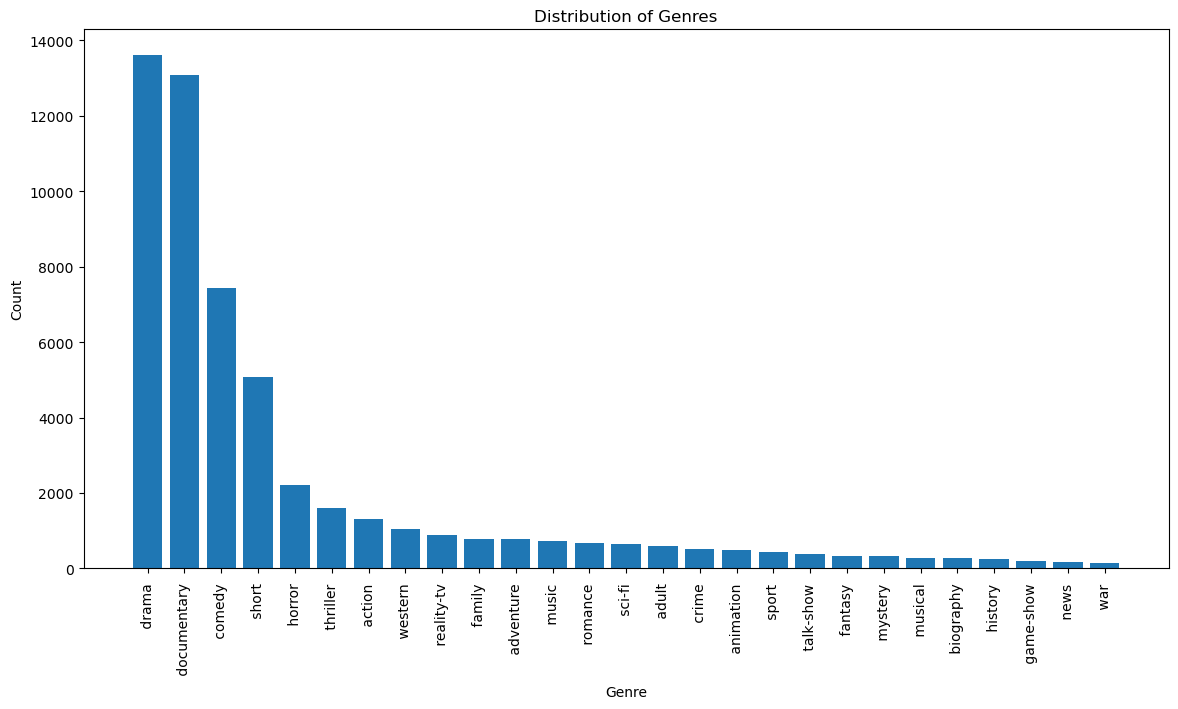

In [6]:
import matplotlib.pyplot as plt

# Plot the distribution of genres using a bar plot
df_train['Genre'].value_counts()

plt.figure(figsize=(14, 7))
genres = df_train['Genre'].value_counts()
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genres')
plt.bar(genres.index, genres.values)
plt.xticks(rotation=90)
plt.show()

In [7]:
import re
import string
import nltk
from nltk.corpus import stopwords

# Define the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# Apply the clean_text function to the 'Description' column in the training and test data
df_train['cleaned_text'] = df_train['Description'].apply(clean_text)
df_test['cleaned_text'] = df_test['Description'].apply(clean_text)


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(df_train['cleaned_text'])

# Transform the test data
X_test = tfidf_vectorizer.transform(df_test['cleaned_text'])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and validation sets
X = X_train
y = df_train['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Using the MonomialNaiveBayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)
model.score(X_val, y_val)

C:\Users\vt020\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vt020\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vt020\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vt020\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd

0.4440652955824034

In [10]:
# Using the LogisticRegressionClassifier

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

classifier.score(X_val, y_val)

C:\Users\vt020\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vt020\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vt020\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

0.587014663838421

In [12]:
# Make predictions on the validation set
y_pred = classifier.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.587014663838421
               precision    recall  f1-score   support

      action        0.61      0.24      0.34       263
       adult        0.92      0.20      0.32       112
   adventure        0.47      0.12      0.18       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.53      0.60      0.56      1443
       crime        0.25      0.01      0.02       107
 documentary        0.65      0.88      0.75      2659
       drama        0.54      0.81      0.65      2697
      family        0.60      0.06      0.11       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.93      0.35      0.51        40
     history        0.00      0.00      0.00        45
      horror        0.67      0.56      0.61       431
       music        0.70      0.43      0.53       144
     musical        0.00      0.00      0.00        50
     mystery        0.00 

C:\Users\vt020\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vt020\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vt020\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vt020\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd

In [13]:
# Use the trained model to make predictions on the test data
X_test_predictions = classifier.predict(X_test)
df_test['Predicted_Genre'] = X_test_predictions

In [14]:
# Save the test_data DataFrame with predicted genres to a CSV file
df_test.to_csv('predicted_genres.csv', index=False)

# Display the 'test_data' DataFrame with predicted genres
df_test

,ID,Title,Description,cleaned_text,Predicted_Genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",r brane loves his life his car his apartment h...,comedy
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico is very naughty child of thr...,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year in the life of albin and his family o...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",his father has died he hasnt spoken with his b...,drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,before he was known internationally as martial...,drama
...,...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",covering multiple genres tales of light dark i...,drama
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,as alice and cora munro attempt to find their ...,drama
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,movie years in the making oliver twist the art...,comedy
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",popular but mysterious rock j mike mallard ask...,drama
